In [1]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras
from PIL import Image
import glob
import random
import pandas as pd
import tensorflow as tf
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam
tf.config.list_physical_devices('GPU')

[]

In [2]:
files=glob.glob("C:/Users/Vulcano/Documents/Mukijo/nsfw classifier 3/dataset2/train/porn/*.jpg")
TrainData = []
index = 0

for file in files:
    img = Image.open(file)
    img = img.resize((299, 299))
    imgarray = np.asarray(img)
    TrainData.append((imgarray,1))

files=glob.glob("C:/Users/Vulcano/Documents/Mukijo/nsfw classifier 3/dataset2/train/not porn/*.jpg")
index = 0
for file in files:
    img = Image.open(file)
    img = img.resize((299, 299))
    imgarray = np.asarray(img)
    TrainData.append((imgarray,0))

print("Done.")

random.shuffle(TrainData)

Done.


In [3]:
files=glob.glob("C:/Users/Vulcano/Documents/Mukijo/nsfw classifier 3/dataset2/test/porn/*.jpg")
TestData = []
index = 0

for file in files:
    img = Image.open(file)
    img = img.resize((299, 299))
    imgarray = np.asarray(img)
    TestData.append((imgarray,1))

files=glob.glob("C:/Users/Vulcano/Documents/Mukijo/nsfw classifier 3/dataset2/test/not porn/*.jpg")
index = 0
for file in files:
    img = Image.open(file)
    img = img.resize((299, 299))
    imgarray = np.asarray(img)
    TestData.append((imgarray,0))

print("Done.")

random.shuffle(TestData)

Done.


In [4]:
print("Train Data ",len(TrainData))
print("Test Data ",len(TestData))

Train Data  13314
Test Data  1399


In [5]:
Train_X = np.array([item[0] for item in TrainData])
Train_Y = np.array([item[1] for item in TrainData])

Test_X = np.array([item[0] for item in TestData])
Test_Y = np.array([item[1] for item in TestData])

Train_X = Train_X.astype('float32')
Test_X = Test_X.astype('float32')

Train_X /= 255
Test_X /= 255

In [8]:
# Memuat model InceptionV3 dengan bobot yang dilatih pada ImageNet
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(299, 299, 3))

# Menambahkan lapisan global pooling dan lapisan Dense di atas model InceptionV3
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(1, activation='sigmoid')(x)

# Menggabungkan model InceptionV3 dengan lapisan yang ditambahkan
model = Model(inputs=base_model.input, outputs=predictions)

# Menetapkan layer base_model agar tidak dapat dilatih
for layer in base_model.layers:
    layer.trainable = False

# Kompilasi model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])



87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 272s 3us/step


In [9]:
# Kompilasi model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [10]:
# Menampilkan struktur model
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)    │ (None, 299, 299, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_188 (Conv2D)           │ (None, 149, 149, 32)      │             864 │ input_layer_2[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization_188       │ (None, 149, 149, 32)      │              96 │ conv2d_188[0][0]           │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation_188 (Activation)   │ (None, 149, 149, 32)      │               0 │ batch_normalization_188[0… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_189 (Conv2D)           │ (None, 147, 147, 32)      │           9,216 │ activation_188[0][0]       │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization_189       │ (None, 147, 147, 32)      │              96 │ conv2d_189[0][0]           │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation_189 (Activation)   │ (None, 147, 147, 32)      │               0 │ batch_normalization_189[0… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_190 (Conv2D)           │ (None, 147, 147, 64)      │          18,432 │ activation_189[0][0]       │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization_190       │ (None, 147, 147, 64)      │             192 │ conv2d_190[0][0]           │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation_190 (Activation)   │ (None, 147, 147, 64)      │               0 │ batch_normalization_190[0… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling2d_8               │ (None, 73, 73, 64)        │               0 │ activation_190[0][0]       │
│ (MaxPooling2D)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_191 (Conv2D)           │ (None, 73, 73, 80)        │           5,120 │ max_pooling2d_8[0][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization_191       │ (None, 73, 73, 80)        │             240 │ conv2d_191[0][0]           │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation_191 (Activation)   │ (None, 73, 73, 80)        │               0 │ batch_normalization_191[0… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_192 (Conv2D)           │ (None, 71, 71, 192)       │         138,24

 Total params: 22,065,185 (84.17 MB)

 Trainable params: 262,401 (1.00 MB)

 Non-trainable params: 21,802,784 (83.17 MB)

In [11]:
model.fit(Train_X, Train_Y, epochs = 50, batch_size = 100)

Epoch 1/50
134/134 ━━━━━━━━━━━━━━━━━━━━ 359s 3s/step - accuracy: 0.9399 - loss: 0.1395
Epoch 2/50
134/134 ━━━━━━━━━━━━━━━━━━━━ 346s 3s/step - accuracy: 0.9903 - loss: 0.0277
Epoch 3/50
134/134 ━━━━━━━━━━━━━━━━━━━━ 338s 3s/step - accuracy: 0.9904 - loss: 0.0313
Epoch 4/50
134/134 ━━━━━━━━━━━━━━━━━━━━ 347s 3s/step - accuracy: 0.9947 - loss: 0.0176
Epoch 5/50
134/134 ━━━━━━━━━━━━━━━━━━━━ 346s 3s/step - accuracy: 0.9955 - loss: 0.0183
Epoch 6/50
134/134 ━━━━━━━━━━━━━━━━━━━━ 339s 3s/step - accuracy: 0.9954 - loss: 0.0110
Epoch 7/50
134/134 ━━━━━━━━━━━━━━━━━━━━ 343s 3s/step - accuracy: 0.9953 - loss: 0.0124
Epoch 8/50
134/134 ━━━━━━━━━━━━━━━━━━━━ 349s 3s/step - accuracy: 0.9978 - loss: 0.0072
Epoch 9/50
134/134 ━━━━━━━━━━━━━━━━━━━━ 340s 3s/step - accuracy: 0.9963 - loss: 0.0102
Epoch 10/50
134/134 ━━━━━━━━━━━━━━━━━━━━ 339s 3s/step - accuracy: 0.9982 - loss: 0.0060
Epoch 11/50
134/134 ━━━━━━━━━━━━━━━━━━━━ 338s 3s/step - accuracy: 0.9989 - loss: 0.0040
Epoch 12/50
134/134 ━━━━━━━━━━━━━━━━━━━━ 

In [12]:
model.evaluate(Test_X,Test_Y)

44/44 ━━━━━━━━━━━━━━━━━━━━ 39s 820ms/step - accuracy: 0.9943 - loss: 0.0184


[0.036237385123968124, 0.9892780780792236]

In [13]:
from sklearn.metrics import confusion_matrix
import numpy as np

# Lakukan prediksi terhadap data testing
predictions = model.predict(Test_X)
# Untuk setiap prediksi, ambil kelas dengan nilai probabilitas tertinggi sebagai label prediksi
predicted_labels = np.argmax(predictions, axis=1)

# Hitung confusion matrix
cm = confusion_matrix(Test_Y, predicted_labels)

print("Confusion Matrix:")
print(cm)


44/44 ━━━━━━━━━━━━━━━━━━━━ 39s 851ms/step
Confusion Matrix:
[[703   0]
 [696   0]]


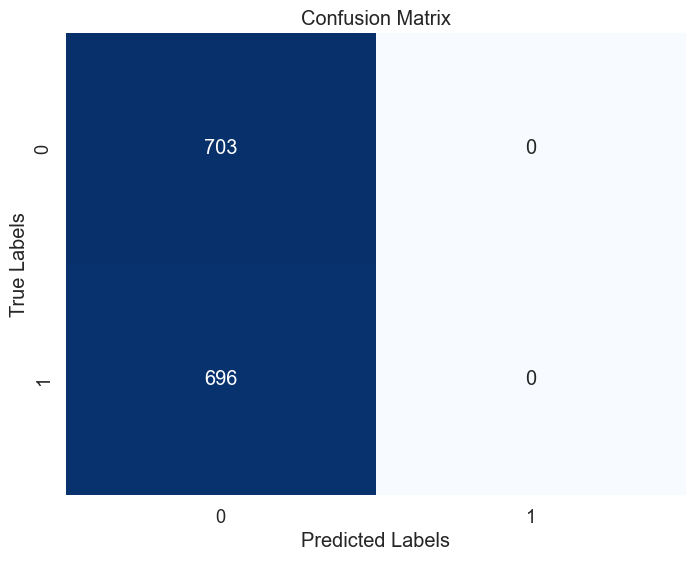

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Hitung confusion matrix
cm = confusion_matrix(Test_Y, predicted_labels)

# Buat plot confusion matrix
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Atur skala font

# Buat heatmap dari confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)

plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


In [14]:
Predictions = model.predict(Test_X)

44/44 ━━━━━━━━━━━━━━━━━━━━ 37s 838ms/step


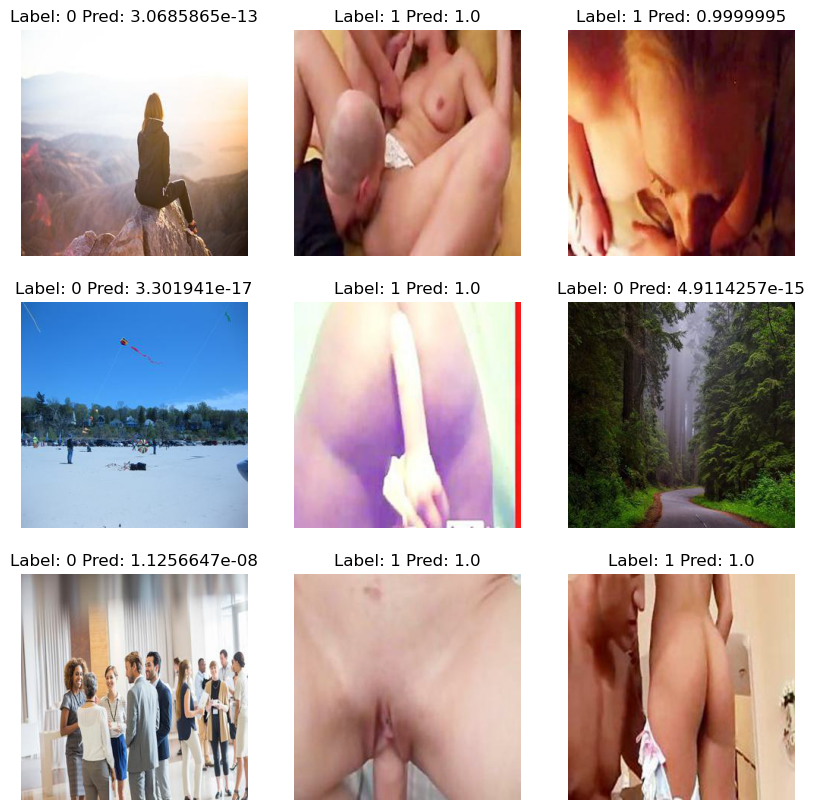

In [15]:
plt.figure(figsize=(10, 10))
a = 95
for i in range(0,9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(Test_X[i+a])
    plt.title("Label: "+str(Test_Y[i+a])+" Pred: "+str(Predictions[i+a][0]))
    plt.axis("off")

In [16]:
model.save('nsfw_model_with_tl.h5')

In [17]:
model.save('nsfw_model_with_tl.keras')

In [18]:
from tensorflow import keras
from PIL import Image
import numpy as np
import os
import matplotlib.pyplot as plt

# Load the trained model
model = keras.models.load_model('nsfw_model_with_tl.h5')

In [19]:
# Load the new image
img = Image.open('C:/Users/Vulcano/Documents/Mukijo/nsfw classifier 1/prediksi/1.jpg')

# Preprocess the image
img = img.resize((299, 299))  # Resize to match model's expected input size
img_array = np.array(img)  # Convert image to numpy array
img_array = img_array.astype('float32') / 255  # Normalize pixel values

# Expand dimensions to match model's input shape
img_array = np.expand_dims(img_array, axis=0)

# Perform prediction
prediction = model.predict(img_array)

# The prediction will be a probability, if you have binary classification,
# you may round it to get the predicted class
predicted_class = round(prediction[0][0])

# Print the predicted class
if predicted_class == 1:
    print("Porn")
else:
    print("Not Porn")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
Porn


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━

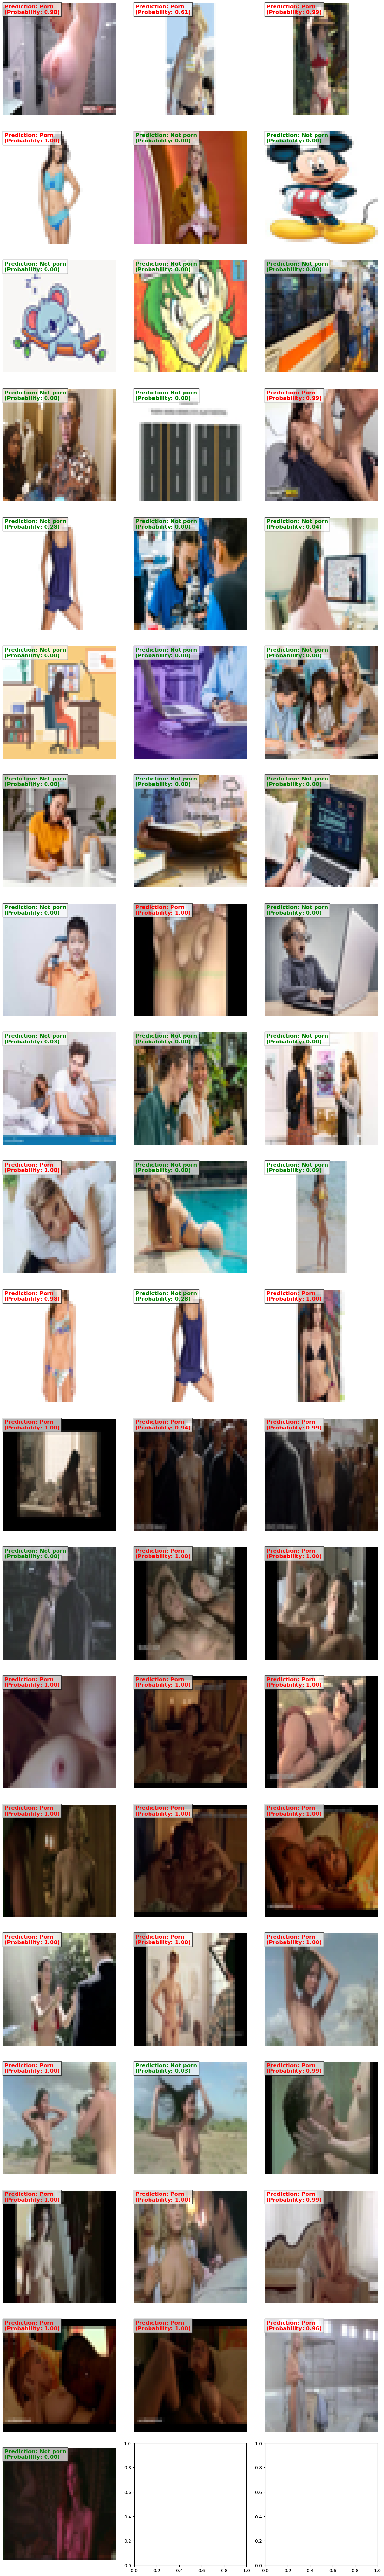

In [19]:
# Path to the folder containing images
folder_path = 'C:/Users/Vulcano/Documents/Mukijo/nsfw classifier 1/prediksi'

# Get a list of image files
image_files = [file for file in os.listdir(folder_path) if file.endswith((".jpg", ".jpeg", ".png"))]

# Calculate the number of rows needed to display images in 3 columns
num_images = len(image_files)
num_rows = (num_images + 2) // 3  # Add 2 to round up to the nearest integer

# Create a figure and axis objects
fig, axes = plt.subplots(num_rows, 3, figsize=(12, num_rows * 4))

# Iterate through all images in the folder
for i, filename in enumerate(image_files):
    # Load the image
    img_path = os.path.join(folder_path, filename)
    img = Image.open(img_path)

    # Preprocess the image
    img = img.resize((299, 299))  # Resize to match model's expected input size
    img_array = np.array(img)  # Convert image to numpy array
    img_array = img_array.astype('float32') / 255  # Normalize pixel values

    # Expand dimensions to match model's input shape
    img_array = np.expand_dims(img_array, axis=0)

    # Perform prediction
    prediction = model.predict(img_array)

    # Get the predicted class and probability
    predicted_class = round(prediction[0][0], 2)
    predicted_class_formatted = "{:.2f}".format(predicted_class)
    
    if predicted_class >= 0.5:
        predicted_label = "Porn"
        color = "red"
    else:
        predicted_label = "Not porn"
        color = "green"

    # Determine subplot position
    row = i // 3
    col = i % 3

    #resize before displaying
    img = img.resize((48, 48))
    
    # Display the image
    axes[row, col].imshow(img)
    axes[row, col].axis('off')

    # Add text overlay
    axes[row, col].text(0, 0, f"Prediction: {predicted_label}\n(Probability: {predicted_class_formatted})",
                        color=color, fontsize=12, fontweight='bold',
                        bbox=dict(facecolor='white', alpha=0.7),
                        verticalalignment='top', horizontalalignment='left')

# Adjust layout
plt.tight_layout()
plt.show()
